# Mini Project

## 자전거 수요량 예측 데이터 분석  
https://www.kaggle.com/c/bike-sharing-demand



### 1. 가설 설정
데이터 분석 전에 데이터 간의 연관성에 대한 임의의 가설 설정하기

### 2. 데이터 시각화 
4종류 이상의 시각화 기법을 사용하여 그래프 그리기
Seaborn 라이브러리 활용

### 3. 데이터 분석
각 그래프로부터 얻을 수 있는 의미 도출

### 4. 최초의 가설 검정
가설이 유의미한지 여부 판단하기

In [70]:
import pandas as pd 
pd.plotting.register_matplotlib_converters() 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
# 읽어드릴 파일 경로 : /dataset/bike_sharing_demand_train.csv
filepath = "./dataset/bike_sharing_demand_train.csv"
bikes = pd.read_csv(filepath)

In [19]:
bikes.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


### [추가] 날짜 데이터 파싱

In [106]:
# 데이터 타입 변경: object -> datatime
data['datetime'] = data['datetime'].astype('datetime64')

In [107]:
data.dtypes

datetime      datetime64[ns]
season                 int64
holiday                int64
workingday             int64
weather                int64
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
casual                 int64
registered             int64
count                  int64
year                   int64
month                  int64
day                    int64
hour                   int64
minute                 int64
second                 int64
dtype: object

In [108]:
data['year']= data['datetime'].dt.year
data['month']= data['datetime'].dt.month
data['day']= data['datetime'].dt.day
data['hour']= data['datetime'].dt.hour
data['minute']= data['datetime'].dt.minute
data['second']= data['datetime'].dt.second

data.shape

(10886, 18)

In [109]:
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0


[Text(0, 0.5, 'count'), Text(0.5, 1.0, 'Rental amount by hour')]

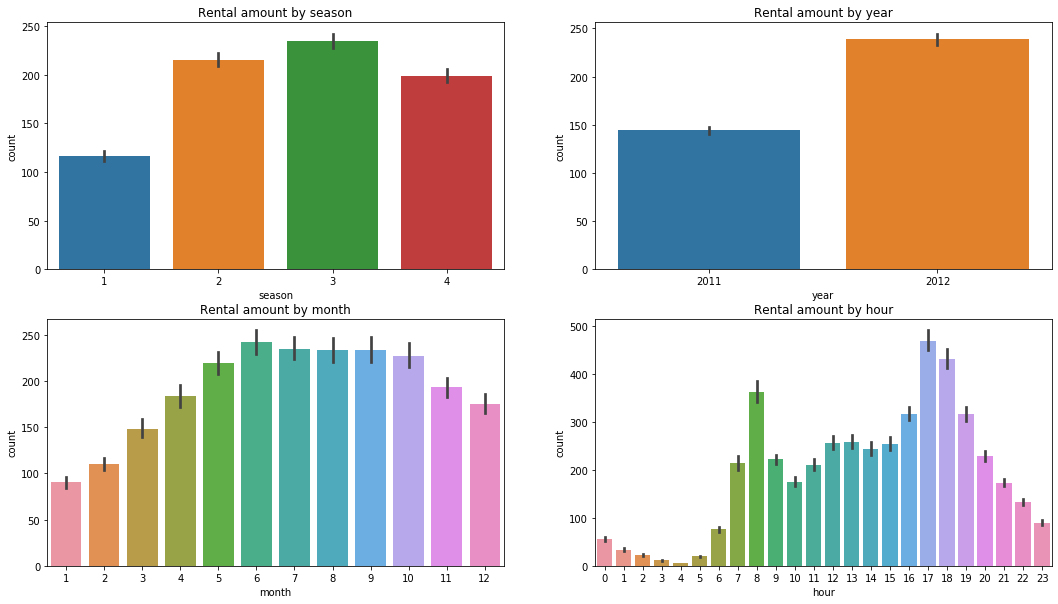

In [130]:
# 가설1. 자전거 이용자 수는 봄에 가장 많을 것이다. (기각)
# 가설2. 자전거 이용자 수는 다음 해에 더 증가할 것이다. (채택)
# 가설3. 자전거 이용자 수는 5월이 가장 많을 것이다. (기각)
# 가설4. 자전거 이용자 수는 18시에 가장 많을 것이다. (기각)

figure, ((ax1,ax2),(ax3,ax4)) = plt.subplots(nrows = 2, ncols = 2) 
figure.set_size_inches(18,10) 

sns.barplot(data=data, x="season", y="count", ax = ax1)
sns.barplot(data=data, x = "year", y = "count", ax = ax2) 
sns.barplot(data=data, x = "month", y = "count", ax = ax3)  
sns.barplot(data=data, x = "hour", y = "count", ax = ax4) 
ax1.set(ylabel = "count", title = "Rental amount by season")
ax2.set(ylabel = "count", title = "Rental amount by year") 
ax3.set(ylabel = "count", title = "Rental amount by month") 
ax4.set(ylabel = "count", title = "Rental amount by hour")

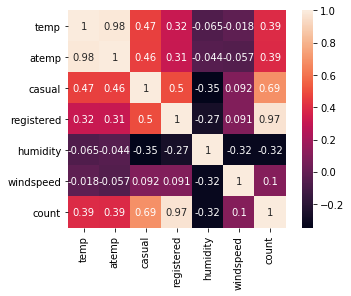

In [135]:
# Pearson correlation coefficient
# 가설5. 실제온도와 체감온도는 강한 양의 상관관계에 있을 것이다. (채택) 
cor = bikes[['temp', 'atemp', 'casual', 'registered', 'humidity', 'windspeed', 'count']].corr()
sns.heatmap(cor, square=True, annot=True)